In [27]:
!pip install -r  requirements.txt

In [28]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv('processed\CEHHbInToW_final.csv')
df

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,credit Score Bins,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.302971,-1.041760,-1.225848,1,1,1,0.021886,1,1,True,False,False,True,False
1,0.204855,-1.387538,0.117350,1,0,1,0.216534,0,1,False,False,True,True,False
2,0.302971,1.032908,1.333053,3,1,0,0.240687,1,0,True,False,False,True,False
3,0.000000,-1.387538,-1.225848,2,0,0,-0.108918,0,2,True,False,False,True,False
4,0.401087,-1.041760,0.785728,1,1,1,-0.365276,0,4,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.008622,-0.004426,-1.225848,2,1,0,-0.066419,0,3,True,False,False,False,True
9996,-0.383844,1.724464,-0.306379,1,1,1,0.027988,0,0,True,False,False,False,True
9997,-0.285728,0.687130,-1.225848,1,0,1,-1.008643,1,2,True,False,False,True,False
9998,0.302971,-0.695982,-0.022608,2,1,0,-0.125231,1,3,False,True,False,False,True


In [30]:
df.iloc[df.isnull().any(axis=1).values, :]

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,credit Score Bins,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male


In [31]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
SMOTE = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = SMOTE.fit_resample(X_train, y_train) # Here we have minor as 1 and major as 0. so need to upsample that 1 class

C:\Users\REDTECH\AppData\Local\Temp\ipykernel_8892\4037410885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


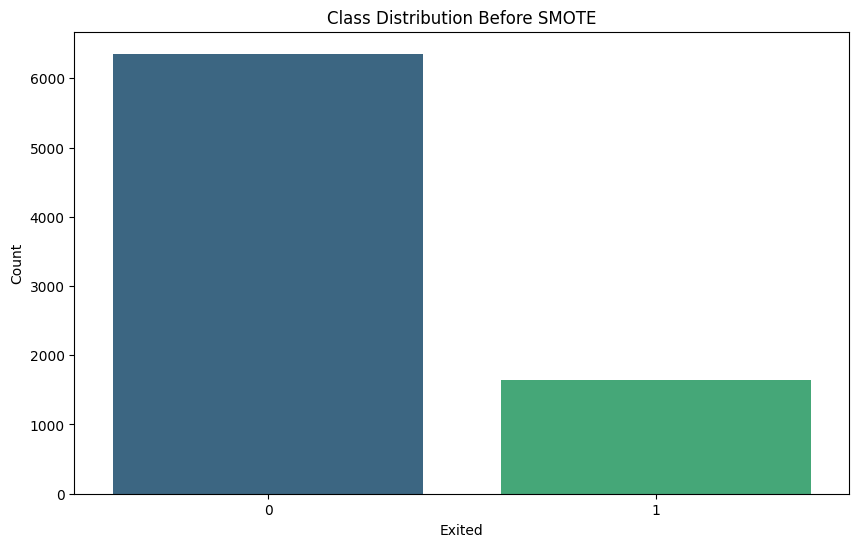

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

C:\Users\REDTECH\AppData\Local\Temp\ipykernel_8892\2412905286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='viridis')


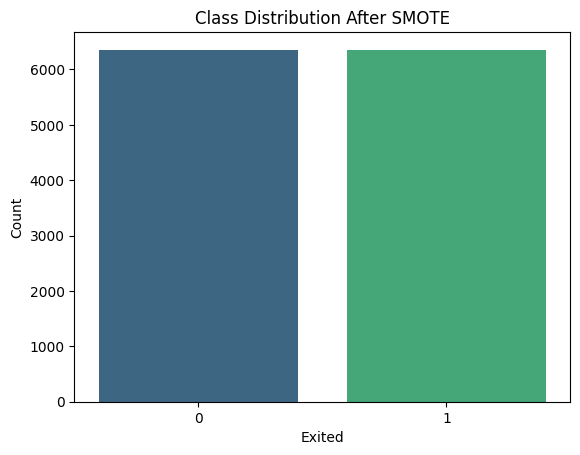

In [34]:
plt.Figure(figsize=(10, 6))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

- We only upsample / downsample trainset. we keep test set as it is in real world

C:\Users\REDTECH\AppData\Local\Temp\ipykernel_8892\2408576404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='viridis')


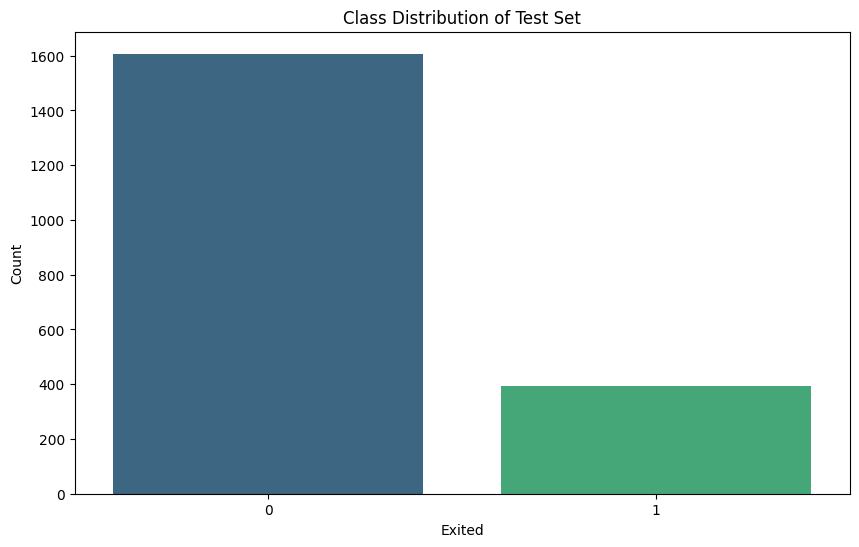

In [ ]:
plt.figure(figsize=(10, 6))    
sns.countplot(x=y_test, palette='viridis')
plt.title('Class Distribution of Test Set')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [39]:
np.savez('../../artifacts/X_train_resampled.npz', X_train_resampled)
np.savez('../../artifacts/y_train_resampled.npz', y_train_resampled)
np.savez('../../artifacts/X_test.npz', X_test)
np.savez('../../artifacts/y_test.npz', y_test)